In [2]:
import pandas as pd
import scipy as sp
# import matplotlib
# import matplotlib.colors as mcolors
# import pickle 
# from collections import Counter
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster, to_tree, dendrogram, linkage
# import math
from scipy.spatial.distance import squareform
# import numpy as np
# import networkx as nx
# from graspologic.match import graph_match
# from sklearn import datasets, manifold
# from matplotlib.pyplot import cm
import seaborn as sns
from adjustText import adjust_text
from pathlib import Path


In [3]:
from module.Ceval.dendrogram_eval import get_clustering_stats

In [4]:
datadate = '20231124'

nb_name = '04_vnc_ceval'

cwd = Path.cwd()
save_things=False
if save_things:
    fig_dir = cwd.parent / 'figures' / nb_name
    fig_dir.mkdir(parents=True, exist_ok=True)

In [5]:
vnc_edges = pd.read_csv(f'../../data/vnc/{datadate}_data/manc_edges_{datadate}.csv', index_col=0)

vnc_edges = vnc_edges.groupby(['bodyId_pre', 'bodyId_post'], as_index=False).weight.sum()
vnc_edges.rename(columns={'bodyId_pre':'pre', 'bodyId_post':'post'}, inplace=True)
vnc_meta = pd.read_csv(f'../../data/vnc/{datadate}_data/manc_meta_{datadate}.csv', index_col=0)
vnc_edges.loc[:,'attr'] = vnc_edges.weight.apply(lambda x: {'weight':x})


vnc_meta.bodyId = vnc_meta.bodyId.astype('str')


In [6]:
heminames = ['07B', '11A', '11B', '02A', '18B', '12A', '01A', '10B', '06A', \
             '06B', '19A', '21A', '03B', '23B', '12B', '13B', '05B', '20A.22A', \
             '08A', '09A']

n_ids = list(set(vnc_meta[(vnc_meta['hemilineage'].isin(heminames))].bodyId.values)) # the integers have the numpy.int64 datatype!
n_ids = sorted(n_ids)

In [7]:
# enriched_clusters.to_parquet(f'./data/vnc/{datadate}_data/14_full_vnc_gmd_slice/func_hemi_enriched_clusters_u30.parquet')
enriched_clusters = pd.read_parquet(f'../../data/vnc/{datadate}_data/14_full_vnc_gmd_slice/func_hemi_enriched_clusters_u30.parquet')

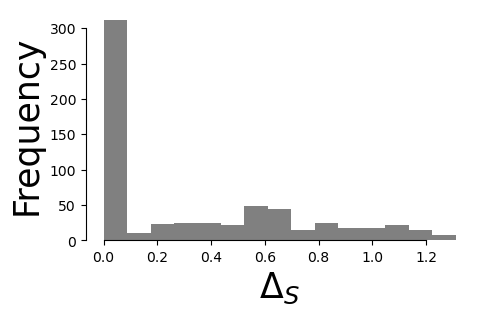

In [8]:
plt.figure(figsize=(5,3))
plt.hist(enriched_clusters.delta_S.values, bins=15, color='grey')
plt.xlabel('$\\Delta_S$', size=25)
plt.ylabel('Frequency', size=25)
sns.despine(trim=True, offset=0.05)
if save_things:
    plt.savefig(f'../figures/{nb_name}/cluster_specdivs.png', transparent=True, dpi=300, bbox_inches='tight')
    plt.savefig(f'../figures/{nb_name}/cluster_specdivs.pdf', transparent=True, dpi=300,bbox_inches='tight')
plt.show()

In [9]:
enriched_clusters.sort_values('delta_S')

,index,cluster,dists,n,e_num,enriched,lowest_pval,delta_S
2493,5760,"[13635, 25104]",817.165834,2,1,[wing_wave],8.792129e-03,0.000000
1756,7757,"[11833, 24573, 11699, 11845, 11363, 11369]",1590.167811,6,1,[uc_leg_movement],5.329684e-04,-0.000000
936,8091,"[166407, 26546, 166555, 25921, 158816, 26509, ...",3005.545480,26,1,[posture],1.294164e-09,-0.000000
1757,7759,"[11132, 12250, 163638, 11395, 11131, 11385]",1590.504071,6,1,[uc_leg_movement],5.329684e-04,-0.000000
928,8032,"[159578, 24955, 26827, 22830, 23087, 21744, 25...",2282.025897,27,1,[posture],5.879267e-10,-0.000000
...,...,...,...,...,...,...,...,...
918,7196,"[11872, 23431, 11814, 11826, 12692, 12120, 122...",1197.319476,28,1,[wing_wave],3.282855e-03,1.249813
377,2514,"[22293, 26518, 31901, 19651, 157184, 16595, 29...",454.223272,20,2,"[wing_buzz, takeoff]",8.845831e-04,1.266943
993,4580,"[24109, 163071, 18696, 25954, 100692, 25973, 2...",651.478777,21,1,[walking],1.150545e-02,1.273284
1300,3510,"[14379, 16121, 16240, 12262, 12839, 11811, 125...",540.342669,10,1,[wing_wave],1.018254e-02,1.279854


# Clustering metrics on functional hemi run:

In [10]:
output = pd.read_parquet(f'../../data/vnc/{datadate}_data/gmatching/vnc_ewg_gmd_M50_hemisample_slice_overlap.parquet')

In [11]:
output

,fnorm,graph_edit_distance,euclidean_distance,isexact,id_1,id_2,node_overlap,ntype_overlap
0,621.109491,10605,621.109491,False,100000,100002,0.010101,0.030928
1,926.937430,15977,926.937430,False,100000,10004,0.000000,0.000000
2,556.151059,8422,556.151059,False,100000,100054,0.000000,0.020408
3,620.849418,10812,620.849418,False,100000,100055,0.020408,0.063830
4,776.962033,14516,776.962033,False,100000,100062,0.000000,0.020408
...,...,...,...,...,...,...,...,...
36898340,846.047871,12661,846.047871,False,76088,86815,0.000000,0.000000
36898341,836.588310,13686,836.588310,False,76088,90495,0.000000,0.000000
36898342,654.929767,10259,654.929767,False,80571,86815,0.000000,0.000000
36898343,670.815921,11242,670.815921,False,80571,90495,0.000000,0.000000


In [12]:
heminames = ['07B', '11A', '11B', '02A', '18B', '12A', '01A', '10B', '06A', \
             '06B', '19A', '21A', '03B', '23B', '12B', '13B', '05B', '20A.22A', \
             '08A', '09A']

n_ids = list(set(vnc_meta[(vnc_meta['hemilineage'].isin(heminames))].bodyId.values)) # the integers have the numpy.int64 datatype!

# n_ids = list(set(vnc_meta[(vnc_meta['hemilineage'].isin(heminames))&(vnc_meta['birthtime']=='secondary')].bodyId.values)) # the integers have the numpy.int64 datatype!

n_ids = sorted(n_ids)

In [13]:
# n_ids = list(set(vnc_meta[(vnc_meta['hemilineage'].isin(heminames))].bodyId.values)) # the integers have the numpy.int64 datatype!


In [14]:

len(n_ids)

8591

In [15]:
secondary_neurons_only = output[output.id_1.isin(n_ids)&output.id_2.isin(n_ids)]

In [16]:
M=50
dist_df =  output #secondary_neurons_only #

dist_type = 'euclidean_distance'

method='ward'

cond_dist = (dist_df[dist_type].values)
Z = linkage(cond_dist, method=method) ####### linkage

ind_to_id = [str(i) for i in n_ids]
# title = f'{heminames}, M ={M}, {dist_type}, method={method}'


# N_type_data= len(func_hemi_map) + 1


In [17]:
# dummy = {key:hemitype_dict[key] for key in list(hemitype_dict.keys())[:0]}

# hemitype_stats_df = get_clustering_stats(Z=Z, ctype_to_id=dummy, ind_to_id=ind_to_id)
# hemitype_stats_df['av_size'] = hemitype_stats_df['m_p']/hemitype_stats_df['n_p']
# hemitype_stats_df['coverage'] = hemitype_stats_df['m_p']/(hemitype_stats_df['s_p'] + hemitype_stats_df['m_p'])
# # hemitype_stats_df.to_parquet(f'./data/vnc/{datadate}_data/{nb_name}/secn_hemitype_stats_df.parquet')

In [18]:
# hemitype_dict = vnc_meta[vnc_meta['bodyId'].isin(ind_to_id)].groupby('hemilineage').bodyId.apply(list).to_dict()

# hemitype_stats_df = get_clustering_stats(Z=Z, ctype_to_id=hemitype_dict, ind_to_id=ind_to_id)
# hemitype_stats_df['av_size'] = hemitype_stats_df['m_p']/hemitype_stats_df['n_p']
# hemitype_stats_df['coverage'] = hemitype_stats_df['m_p']/(hemitype_stats_df['s_p'] + hemitype_stats_df['m_p'])
# hemitype_stats_df.to_parquet(f'./data/vnc/{datadate}_data/{nb_name}/secn_hemitype_stats_df.parquet')

# 9 mins 35s

In [19]:
# dummy = {key:hemitype_dict[key] for key in list(hemitype_dict.keys())[:0]}
# hemitype_stats_df = get_clustering_stats(Z=Z, ctype_to_id=dummy, ind_to_id=ind_to_id)
# hemitype_stats_df['av_size'] = hemitype_stats_df['m_p']/hemitype_stats_df['n_p']
# hemitype_stats_df['coverage'] = hemitype_stats_df['m_p']/(hemitype_stats_df['s_p'] + hemitype_stats_df['m_p'])
# # hemitype_stats_df.to_parquet(f'./data/vnc/{datadate}_data/{nb_name}/secn_hemitype_stats_df.parquet')

In [20]:
hemitype_stats_df = pd.read_parquet(f'../../data/vnc/{datadate}_data/14c_vncgmdslice_thesis_figures/hemitype_stats_df.parquet') # done with primary and secondary neurons
# hemitype_stats_df = pd.read_parquet(f'./data/vnc/{datadate}_data/{nb_name}/secn_hemitype_stats_df.parquet') # 

In [21]:
hemitype_stats_df

,labels,len,lps,pms,n_p,m_p,s_p,av_size,coverage
0,01A,413,0.043584,0.048074,91,311,102,3.417582,0.753027
1,02A,308,0.025974,0.035851,80,209,99,2.612500,0.678571
2,03B,487,0.034908,0.056687,102,391,96,3.833333,0.802875
3,05B,327,0.030581,0.038063,84,233,94,2.773810,0.712538
4,06A,603,0.019900,0.070190,160,485,118,3.031250,0.804312
5,06B,447,0.031320,0.052031,106,324,123,3.056604,0.724832
6,07B,630,0.014286,0.073333,159,475,155,2.987421,0.753968
7,08A,351,0.034188,0.040857,79,271,80,3.430380,0.772080
8,09A,528,0.060606,0.061460,76,423,105,5.565789,0.801136
9,10B,442,0.074661,0.051449,68,373,69,5.485294,0.843891


In [22]:
hemitype_stats_df.pms.mean()

0.05

In [23]:
hemitype_stats_df.m_p.sum()/hemitype_stats_df.len.sum()

0.7648702130136189

In [24]:
# celltype_dict = vnc_meta[vnc_meta['bodyId'].isin(ind_to_id)].groupby('type').bodyId.apply(list).to_dict()
# celltype_stats_df = get_clustering_stats(Z=Z, ctype_to_id=celltype_dict, ind_to_id=ind_to_id)
# celltype_stats_df['av_size'] = celltype_stats_df['m_p']/celltype_stats_df['n_p']
# celltype_stats_df['coverage'] = celltype_stats_df['m_p']/(celltype_stats_df['s_p'] + celltype_stats_df['m_p'])
# celltype_stats_df.to_parquet(f'./data/vnc/{datadate}_data/{nb_name}/secn_celltype_stats_df.parquet')
# # 17 mins

In [25]:
# celltype_dict = vnc_meta[vnc_meta['bodyId'].isin(ind_to_id)].groupby('type').bodyId.apply(list).to_dict()
# celltype_stats_df = get_clustering_stats(Z=Z, ctype_to_id=celltype_dict, ind_to_id=ind_to_id)
# celltype_stats_df['av_size'] = celltype_stats_df['m_p']/celltype_stats_df['n_p']
# celltype_stats_df['coverage'] = celltype_stats_df['m_p']/(celltype_stats_df['s_p'] + celltype_stats_df['m_p'])
# celltype_stats_df.to_parquet(f'./data/vnc/{datadate}_data/{nb_name}/celltype_stats_df.parquet')
# # 33 mins

In [27]:
celltype_stats_df = pd.read_parquet(f'../../data/vnc/{datadate}_data/14c_vncgmdslice_thesis_figures/celltype_stats_df.parquet') # 

In [28]:
celltype_stats_df

,labels,len,lps,pms,n_p,m_p,s_p,av_size,coverage
0,AN01A001,2,1.000000,1.000000,1,2,0,2.000000,1.000000
1,AN01A006,2,1.000000,1.000000,1,2,0,2.000000,1.000000
2,AN01A014,2,1.000000,1.000000,1,2,0,2.000000,1.000000
3,AN01A021,2,0.500000,0.000233,0,0,2,NaN,0.000000
4,AN01A033,2,1.000000,1.000000,1,2,0,2.000000,1.000000
...,...,...,...,...,...,...,...,...,...
1645,vMS11,15,0.466667,0.001746,2,11,4,5.500000,0.733333
1646,vMS12,20,0.800000,0.013477,2,19,1,9.500000,0.950000
1647,vMS13,2,0.500000,0.001574,0,0,2,NaN,0.000000
1648,vPR6,7,1.000000,1.000000,1,7,0,7.000000,1.000000


In [29]:
# celltype_stats_df = pd.read_parquet(f'../../data/vnc/{datadate}_data/{nb_name}/secn_celltype_stats_df.parquet') # 

In [30]:
celltype_stats_df.pms.mean()

0.2869969054658422

In [31]:
celltype_stats_df.m_p.sum()/celltype_stats_df.len.sum()

0.570240187463386

In [32]:
# celltype_dict = vnc_meta[vnc_meta['bodyId'].isin(ind_to_id)].groupby('type').bodyId.apply(list).to_dict()

# dummy = {key:celltype_dict[key] for key in list(celltype_dict.keys())[:100]}
# celltype_stats_df = get_clustering_stats(Z=Z, ctype_to_id=dummy, ind_to_id=ind_to_id)
# celltype_stats_df['av_size'] = celltype_stats_df['m_p']/celltype_stats_df['n_p']
# celltype_stats_df['coverage'] = celltype_stats_df['m_p']/(celltype_stats_df['s_p'] + celltype_stats_df['m_p'])



In [33]:
hemitype_dict = vnc_meta[vnc_meta['bodyId'].isin(ind_to_id)].groupby('hemilineage').bodyId.apply(list).to_dict()


In [34]:
label = list(hemitype_dict.keys())[6]
ids_to_inspect = hemitype_dict[label]
len(ids_to_inspect)

630

In [35]:
label = list(hemitype_dict.keys())[0]
ids_to_inspect = hemitype_dict[label]
dummy_dict = {label:ids_to_inspect}
dummy_stats_df = get_clustering_stats(Z=Z, ctype_to_id=dummy_dict, ind_to_id=ind_to_id)
# 57s

In [36]:
n_ids_meta = vnc_meta[vnc_meta['bodyId'].isin(ind_to_id)].copy(True).set_index('bodyId')


In [37]:
hemi_ind = n_ids_meta.loc[n_ids]['hemilineage'].to_numpy()
hemi_uniques = list(set(hemi_ind))

func_hemi_map = {'posture':['03B', '23B', '12B', '13B', '05B', '20A.22A', '08A', '09A'], \
                 'uc_leg_movement':['06A', '06B', '19A', '21A', '23B'], \
                 'walking':['18B', '12A', '01A', '10B'],\
                 'wing_wave':['12A', '03B'],
                 'wing_buzz':['07B', '11A', '11B', '02A', '18B', '12A'], \
                 'takeoff': ['07B', '11A', '11B', '18B'] }




In [38]:
func_hemi_to_leaf = {funcname: n_ids_meta[n_ids_meta['hemilineage'].isin(func_hemi_map[funcname])].index.tolist() for funcname in func_hemi_map.keys()}

In [39]:
# label = list(celltype_dict.keys())[0]
# ids_to_inspect = celltype_dict[label]
# print(label)
# cl_purity = cluster_purity_test(targets=ids_to_inspect, Z=Z, ind_to_id=ind_to_id)

# largest_pure = max([len(j) for j in cl_purity])/len(ids_to_inspect)
# # lps.append(largest_pure) 

# n_singletons = sum([len(i)==1 for i in cl_purity])
# n_non_singletons = len(cl_purity) - n_singletons
# n_non_singletons_members = len(ids_to_inspect) - n_singletons
# print('number of singletons', n_singletons)
# print('number non-singleton clusters', n_non_singletons)
# print('number of neurons in non-singleton clusters', n_non_singletons_members)

In [40]:
# celltype_stats_df.to_parquet(f'./data/vnc/{nb_name}/celltye_stats_df.parquet')

In [41]:
label = list(func_hemi_to_leaf.keys())[0]
ids_to_inspect = func_hemi_to_leaf[label]
# dummy_dict = {label:ids_to_inspect}
# dummy_stats_df = get_clustering_stats(Z=Z, ctype_to_id=dummy_dict, ind_to_id=ind_to_id)


In [42]:
len(ids_to_inspect)

3917

In [43]:
# dummy_stats_df

In [44]:
# funchemi_stats_df = get_clustering_stats(Z=Z, ctype_to_id=func_hemi_to_leaf, ind_to_id=ind_to_id)
# funchemi_stats_df['av_size'] = funchemi_stats_df['m_p']/funchemi_stats_df['n_p']
# funchemi_stats_df['coverage'] = funchemi_stats_df['m_p']/(funchemi_stats_df['s_p'] + funchemi_stats_df['m_p'])
# 18 mins
# funchemi_stats_df.to_parquet(f'../../data/vnc/{datadate}_data/{nb_name}/funchemi_stats_df.parquet')

In [46]:
funchemi_stats_df = pd.read_parquet(f'../../data/vnc/{datadate}_data/14c_vncgmdslice_thesis_figures/funchemi_stats_df.parquet')

In [47]:
funchemi_stats_df.pms.mean()

0.22360609940635548

In [48]:
funchemi_stats_df.m_p.sum()/funchemi_stats_df.len.sum()

0.8207530799930591